In [19]:
outcomes <- read.csv("assignment_data/outcome-of-care-measures.csv", colClasses = "character")
head(outcomes)

,Provider.Number,Hospital.Name,Address.1,Address.2,Address.3,City,State,ZIP.Code,County.Name,Phone.Number,⋯,Lower.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Upper.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Number.of.Patients...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Footnote...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Hospital.30.Day.Readmission.Rates.from.Pneumonia,Comparison.to.U.S..Rate...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Lower.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Upper.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Number.of.Patients...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Footnote...Hospital.30.Day.Readmission.Rates.from.Pneumonia
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,,,DOTHAN,AL,36301,HOUSTON,3347938701,⋯,21.3,26.5,891,,17.1,No Different than U.S. National Rate,14.4,20.4,400,
2,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,,,BOAZ,AL,35957,MARSHALL,2565938310,⋯,19.2,26.1,264,,17.6,No Different than U.S. National Rate,15.0,20.6,374,
3,010006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,,,FLORENCE,AL,35631,LAUDERDALE,2567688400,⋯,17.2,22.9,614,,16.9,No Different than U.S. National Rate,14.7,19.5,842,
4,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,,,OPP,AL,36467,COVINGTON,3344933541,⋯,22.4,31.9,135,,19.4,No Different than U.S. National Rate,15.9,23.2,254,
5,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,,,LUVERNE,AL,36049,CRENSHAW,3343353374,⋯,19.9,30.2,59,,18.0,No Different than U.S. National Rate,14.0,22.8,56,
6,010010,MARSHALL MEDICAL CENTER NORTH,8000 ALABAMA HIGHWAY 69,,,GUNTERSVILLE,AL,35976,MARSHALL,2565718000,⋯,20.1,28.2,173,,18.7,No Different than U.S. National Rate,15.7,22.2,326,


Warning message:
"NAs introduced by coercion"


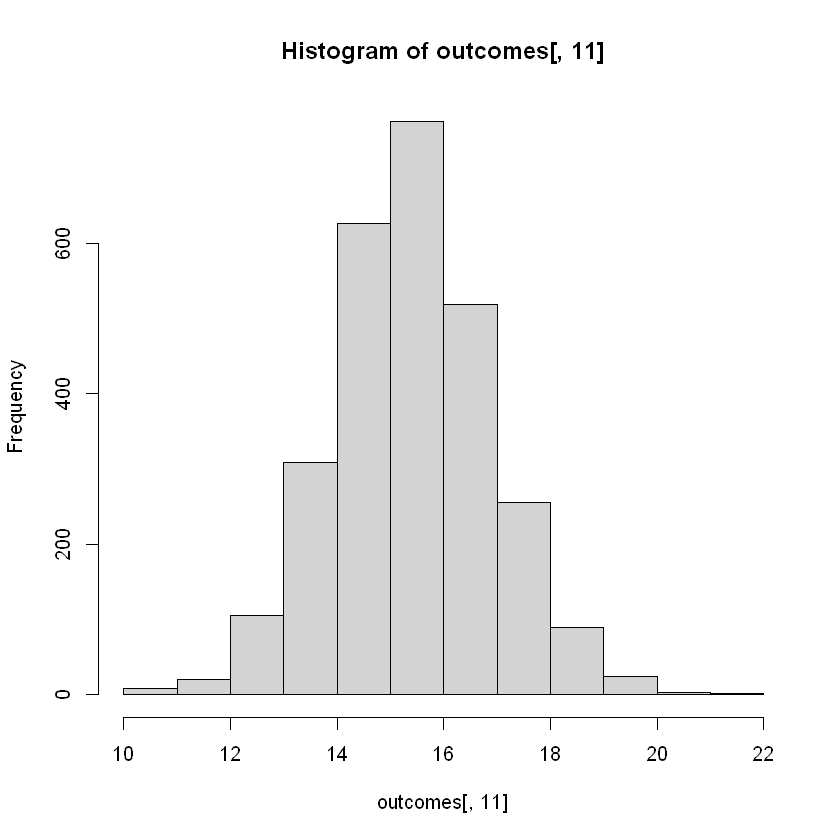

In [17]:
outcomes[, 11] <- as.numeric(outcomes[, 11])
hist(outcomes[, 11])


In [20]:
best <- function(state, outcome) {
  # Check that state is valid
  valid_states <- unique(outcomes[,"State"])
  if (!state %in% valid_states) {
    stop("invalid state")
  }
  
  # Map outcome names to column numbers
  outcome_map <- c(
    "heart attack" = 11,
    "heart failure" = 17, 
    "pneumonia" = 23
  )
  
  # Check that outcome is valid
  if (!outcome %in% names(outcome_map)) {
    stop("invalid outcome")
  }
  
  # Get column number for the outcome
  outcome_col <- outcome_map[outcome]
  
  # Convert outcome column to numeric
  outcomes[, outcome_col] <- as.numeric(outcomes[, outcome_col])
  
  # Filter for the specified state and remove NA values
  state_data <- outcomes[outcomes$State == state & !is.na(outcomes[,outcome_col]), ]
  
  # Find hospital with lowest rate
  min_rate <- min(state_data[, outcome_col])
  best_hospitals <- state_data[state_data[,outcome_col] == min_rate, ]
  
  # If there are ties, sort alphabetically by hospital name
  best_hospital <- sort(best_hospitals$Hospital.Name)[1]
  
  return(best_hospital)
}

In [22]:
best("MD", "pneumonia")

Warning message in best("MD", "pneumonia"):
"NAs introduced by coercion"


[1] "GREATER BALTIMORE MEDICAL CENTER"

In [24]:
rankhospital <- function(state, outcome, num = "best") {
  # Check that state is valid
  valid_states <- unique(outcomes[,"State"])
  if (!state %in% valid_states) {
    stop("invalid state")
  }
  
  # Map outcome names to column numbers
  outcome_map <- c(
    "heart attack" = 11,
    "heart failure" = 17, 
    "pneumonia" = 23
  )

  # Check that outcome is valid
  if (!outcome %in% names(outcome_map)) {
    stop("invalid outcome")
  }
  
  # Get column number for the outcome
  outcome_col <- outcome_map[outcome]
  
  # Convert outcome column to numeric
  outcomes[, outcome_col] <- as.numeric(outcomes[, outcome_col])
  
  # Filter for the specified state and remove NA values
  state_data <- outcomes[outcomes$State == state & !is.na(outcomes[,outcome_col]), ]
  
  # Sort by outcome rate and hospital name
  sorted_data <- state_data[order(state_data[,outcome_col], state_data$Hospital.Name), ]
  
  # Handle "best" and "worst" cases
  if (num == "best") {
    return(sorted_data$Hospital.Name[1])
  } else if (num == "worst") {
    return(sorted_data$Hospital.Name[nrow(sorted_data)])
  } else if (num > nrow(sorted_data)) {
    return(NA)
  } else {
    return(sorted_data$Hospital.Name[num])
  }
}
rankhospital("TX", "heart failure", 4)
rankhospital("MN", "heart attack", 5000)



Warning message in rankhospital("TX", "heart failure", 4):
"NAs introduced by coercion"


[1] "DETAR HOSPITAL NAVARRO"

Warning message in rankhospital("MN", "heart attack", 5000):
"NAs introduced by coercion"


[1] NA

In [26]:
rankall <- function(outcome, num = "best") {
  # Check that outcome is valid
  outcome_map <- c(
    "heart attack" = 11,
    "heart failure" = 17, 
    "pneumonia" = 23
  )
  
  if (!outcome %in% names(outcome_map)) {
    stop("invalid outcome")
  }
  
  # Get column number for the outcome
  outcome_col <- outcome_map[outcome]
  
  # Convert outcome column to numeric
  outcomes[, outcome_col] <- as.numeric(outcomes[, outcome_col])
  
  # Get list of all states
  states <- sort(unique(outcomes$State))
  
  # Create empty vectors to store results
  hospitals <- vector("character", length(states))
  
  # For each state, find the hospital of given rank
  for (i in seq_along(states)) {
    state <- states[i]
    state_data <- outcomes[outcomes$State == state & !is.na(outcomes[,outcome_col]), ]
    
    # Sort by outcome rate and hospital name
    sorted_data <- state_data[order(state_data[,outcome_col], state_data$Hospital.Name), ]
    
    # Get hospital name based on rank
    if (nrow(sorted_data) == 0) {
      hospitals[i] <- NA
    } else if (num == "best") {
      hospitals[i] <- sorted_data$Hospital.Name[1]
    } else if (num == "worst") {
      hospitals[i] <- sorted_data$Hospital.Name[nrow(sorted_data)]
    } else if (num > nrow(sorted_data)) {
      hospitals[i] <- NA
    } else {
      hospitals[i] <- sorted_data$Hospital.Name[num]
    }
  }
  
  # Create and return data frame
  data.frame(
    hospital = hospitals,
    state = states,
    row.names = states,
    stringsAsFactors = FALSE
  )
}

head(rankall("heart attack", 20), 10)



Warning message in rankall("heart attack", 20):
"NAs introduced by coercion"


,hospital,state
,<chr>,<chr>
AK,NA,AK
AL,D W MCMILLAN MEMORIAL HOSPITAL,AL
AR,ARKANSAS METHODIST MEDICAL CENTER,AR
AZ,JOHN C LINCOLN DEER VALLEY HOSPITAL,AZ
CA,SHERMAN OAKS HOSPITAL,CA
CO,SKY RIDGE MEDICAL CENTER,CO
CT,MIDSTATE MEDICAL CENTER,CT
DC,NA,DC
DE,NA,DE


In [27]:
best("SC", "heart attack")
best("NY", "pneumonia")
best("AK", "pneumonia")
rankhospital("NC", "heart attack", "worst")
rankhospital("WA", "heart attack", 7)
rankhospital("TX", "pneumonia", 10)
rankhospital("NY", "heart attack", 7)
r <- rankall("heart attack", 4)
as.character(subset(r, state == "HI")$hospital)
r <- rankall("pneumonia", "worst")
as.character(subset(r, state == "NJ")$hospital)
r <- rankall("heart failure", 10)
as.character(subset(r, state == "NV")$hospital)

Warning message in best("SC", "heart attack"):
"NAs introduced by coercion"


[1] "MUSC MEDICAL CENTER"

Warning message in best("NY", "pneumonia"):
"NAs introduced by coercion"


[1] "MAIMONIDES MEDICAL CENTER"

Warning message in best("AK", "pneumonia"):
"NAs introduced by coercion"


[1] "YUKON KUSKOKWIM DELTA REG HOSPITAL"

Warning message in rankhospital("NC", "heart attack", "worst"):
"NAs introduced by coercion"


[1] "WAYNE MEMORIAL HOSPITAL"

Warning message in rankhospital("WA", "heart attack", 7):
"NAs introduced by coercion"


[1] "YAKIMA VALLEY MEMORIAL HOSPITAL"

Warning message in rankhospital("TX", "pneumonia", 10):
"NAs introduced by coercion"


[1] "SETON SMITHVILLE REGIONAL HOSPITAL"

Warning message in rankhospital("NY", "heart attack", 7):
"NAs introduced by coercion"


[1] "BELLEVUE HOSPITAL CENTER"

Warning message in rankall("heart attack", 4):
"NAs introduced by coercion"


[1] "CASTLE MEDICAL CENTER"

Warning message in rankall("pneumonia", "worst"):
"NAs introduced by coercion"


[1] "BERGEN REGIONAL MEDICAL CENTER"

Warning message in rankall("heart failure", 10):
"NAs introduced by coercion"


[1] "RENOWN SOUTH MEADOWS MEDICAL CENTER"